In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

#1678 O-C

In [3]:
#install pyDF2
!pip install PyPDF2

In [4]:
# importing all the required modules
import PyPDF2

# SEGUNDO EXAMEN

In [150]:
# creating an object 
file = open('notas.pdf', 'rb')

# creating a pdf reader object
fileReader = PyPDF2.PdfFileReader(file)

# print the number of pages in pdf file
print(fileReader)

nro_paginas = fileReader.getNumPages()
print("Hay "+str(nro_paginas)+" paginas")

Hay 113 paginas


In [181]:
TOTAL = []
count = 1
for page in range(nro_paginas):
    pagina = fileReader.getPage(page)
    texto_pagina=pagina.extractText()

    # Obteniendo el cuerpo
    # separando la cabecera
    body = texto_pagina.split("viernes 16 de  febrero 2018",1)
    body = body[1]
    body = body.split("OCAD-UNI")
    final_body = body[0]
    #final_body

    final_body = re.sub('O-C', 'O C', final_body)
    final_body = re.sub('E-H', 'E H', final_body)

    d = r'([A-Z][0-9]|[A-Z])-([0-9][0-9][0-9]|[A-Z]|[0-9][0-9][A-Z])'
    l = re.compile(d).split(final_body)
    #print(l)
        
    arrayAlumnos = []
    for i in range(0,len(l),3):
        raw_alumno = l[i]
        #print(raw_alumno)
        #print(raw_alumno)
        f = r'([0-9])|AUSENTE'
        test = re.compile(f).split(raw_alumno,1)
        #print(test)
        name = test[0]
        resto = test[1:]
        alumno = {}
        #print(resto)
        resto = ['AUSENTE' if v is None else v for v in resto]
        raw_notas  = ''.join(resto)
        gg = r',([0-9]{3})|AUSENTE'
        test2 = re.compile(gg).split(raw_notas)
        test2 = ['0' if v is None else v for v in test2]
        test2 = ['0' if v is '' else v for v in test2]
        if(len(test2)==1):
            break
        notas = []
        for i in range(0,len(test2)-1,2):
            #print(test2)
            dec = test2[i]
            cent = test2[i+1]
            tota_num = dec + '.' + cent
            final_num = float(tota_num)
            notas.append(final_num)
        
        # Aca obtenemos el codigo del alumno
        codigo = test2[len(test2)-1]
        firstNUM = str(count)
        codigo = codigo.replace(firstNUM, "", 1)
        codigo = codigo.replace("*", "")
        codigo = codigo.replace(" ", "")
        alumno['num'] = count
        count=count+1
        
        if len(notas) !=0:
            alumno['codigo'] = codigo
            alumno['nombre'] = name
            alumno['nota1'] = notas[0]
            alumno['nota2'] = notas[1]
            alumno['total'] = notas[2]            
            arrayAlumnos.append(alumno)
    
    TOTAL = TOTAL + arrayAlumnos    

In [183]:
data1 = pd.DataFrame(TOTAL)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 6 columns):
codigo    6178 non-null object
nombre    6178 non-null object
nota1     6178 non-null float64
nota2     6178 non-null float64
num       6178 non-null int64
total     6178 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 289.7+ KB


In [158]:
data1.head()

,codigo,examen1,examen2,nombre,num,total
0,51897D,446.08,75.0,ABANTO ARRIOLA STEPHANIE GIOVANA,1,521.08
1,30346D,210.52,1.0,ABANTO OCMIN MARTIN GUILLERMO,2,211.52
2,41901F,559.72,240.0,ABARCA TINEO EDGAR JUNIOR,3,799.72
3,41032G,183.48,174.0,ABARCA VILLANUEVA PILAR MAURA,4,357.48
4,62514F,342.12,180.0,ABATE DOMINGUEZ JOEL SMITH,5,522.12


In [159]:
data1.tail()

,codigo,examen1,examen2,nombre,num,total
6173,62627F,479.68,285.0,ZUÑIGA RUIZ CRISTIAN DAVID,6174,764.68
6174,90031A,220.48,1.0,ZUÑIGA URBAY RICARDO JIMI JOHN,6175,221.48
6175,30007F,312.64,108.0,AZURITA PALOMINO JEAN PAUL,6176,420.64
6176,41299F,431.12,342.0,ZUTA TUESTA BEIMER ROLANDO,6177,773.12
6177,10506C,298.88,90.0,ZUTA VASQUEZ JOSE DUGAR,6178,388.88


In [160]:
data1.describe()

,examen1,examen2,num,total
count,6178.000000,6178.000000,6178.000000,6178.000000
mean,393.620434,247.399158,3089.500000,641.019592
std,96.861118,131.487138,1783.579313,208.372757
min,0.000000,0.000000,1.000000,0.000000
25%,338.320000,147.000000,1545.250000,496.700000
50%,402.440000,246.000000,3089.500000,652.220000
75%,460.120000,348.000000,4633.750000,794.390000
max,662.200000,600.000000,6178.000000,1237.640000


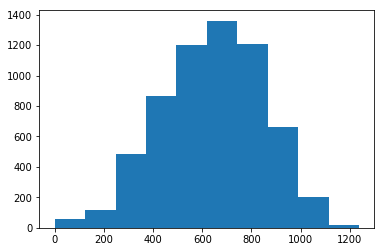

In [177]:
# the histogram of the data
plt.hist(data1['total'])

plt.show()

# TERCER EXAMEN

In [167]:
# creating an object 
file2 = open('final.pdf', 'rb')

# creating a pdf reader object
fileReader2 = PyPDF2.PdfFileReader(file2)

# print the number of pages in pdf file
print(fileReader2)

nro_paginas2 = fileReader2.getNumPages()
print("Hay "+str(nro_paginas2)+" paginas")

Hay 250 paginas


In [185]:
TOTAL = []
count = 1
for x in range(nro_paginas2):
    primera_pagina = fileReader2.getPage(x)

    # Obtenemos el cuerpo del texto
    cuerpo = primera_pagina.extractText()
    cuerpo = cuerpo.split("Impresión:",1)
    cuerpo = cuerpo[1]
    cuerpo = cuerpo.split("OCAD-UNI")
    cuerpo = cuerpo[0]
    #cuerpo

    #Separamos por codigos
    regex = r'([0-9]{5}[A-Z])'
    l = re.compile(regex).split(cuerpo)
    arrayAlumnos = []
    
    for i in range(1,len(l),2):
        codigo = l[i]
        resto = l[i+1]
        alumno = {}
        alumno['codigo'] = codigo
        pat = r'\*[A-Z][0-9]\*'
        part1 = re.compile(pat).split(resto)
        if (len(part1)==1):
            arr = re.compile(" ").split(part1[0])
            notas = arr[0]
            gg = r',([0-9]{3})|AUSENTE'
            arrNotes = re.compile(gg).split(notas)
            arrNotes = ['AUSENTE' if v is None else v for v in arrNotes]
            if(arrNotes[1]=='AUSENTE'):
                alumno['nota1'] = 0
            else:
                alumno['nota1'] = float(arrNotes[0]+'.'+arrNotes[1])

            if(arrNotes[3]=='AUSENTE'):
                alumno['nota2'] = 0
            else:
                alumno['nota2'] = float(arrNotes[2]+'.'+arrNotes[3])

            if(arrNotes[5]=='AUSENTE'):
                alumno['nota3'] = 0
            else:
                alumno['nota3'] = float(arrNotes[4]+'.'+arrNotes[5])

            alumno['puntajefinal'] = float(arrNotes[6]+'.'+arrNotes[7])
            alumno['notavigesimal'] = float(arrNotes[8]+'.'+arrNotes[9])
            alumno['especialidad'] = '-'
        elif (len(part1)==2):
            pat2 = r'([A-Z])'
            arr = re.compile(" ").split(part1[1])
            especialidad = arr[1:]
            especialidad[0] = ''.join([i for i in especialidad[0] if not i.isdigit()])
            especialidad = " ".join(especialidad)
            nota = arr[0]
            gg = r',([0-9]{3})'
            nota = re.compile(gg).split(nota)
            alumno['nota1'] = float(nota[0]+'.'+nota[1])
            alumno['nota2'] = float(nota[2]+'.'+nota[3])
            alumno['nota3'] = float(nota[4]+'.'+nota[5])
            alumno['puntajefinal'] = float(nota[6]+'.'+nota[7])
            alumno['notavigesimal'] = float(nota[8]+'.'+nota[9])
            alumno['especialidad'] = especialidad
        #print(alumno)
        arrayAlumnos.append(alumno)
    TOTAL = TOTAL + arrayAlumnos


In [186]:
len(TOTAL)

5571

In [188]:
data2 = pd.DataFrame(TOTAL)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 7 columns):
codigo           5571 non-null object
especialidad     5571 non-null object
nota1            5571 non-null float64
nota2            5571 non-null float64
nota3            5571 non-null float64
notavigesimal    5571 non-null float64
puntajefinal     5571 non-null float64
dtypes: float64(5), object(2)
memory usage: 304.7+ KB


In [189]:
data2.head()

,codigo,especialidad,nota1,nota2,nota3,notavigesimal,puntajefinal
0,30021F,-,446.36,180.0,0.0,6.789,626.36
1,30113D,CIENCIA DE LA COMPUTACIÓN,430.96,348.0,421.0,13.007,1199.96
2,30153I,-,330.84,294.0,364.0,10.719,988.84
3,30162H,-,433.76,360.0,307.0,11.932,1100.76
4,30214A,-,395.48,336.0,384.0,12.091,1115.48


In [190]:
#pd.merge(data1, data2, on="codigo")
dfinal = pd.merge(data1, data2, on=['codigo','nota1','nota2'])
dfinal

,codigo,nombre,nota1,nota2,num,total,especialidad,nota3,notavigesimal,puntajefinal
0,30346D,ABANTO OCMIN MARTIN GUILLERMO,210.52,1.0,2,211.52,-,108.0,3.463,319.52
1,41901F,ABARCA TINEO EDGAR JUNIOR,559.72,240.0,3,799.72,-,422.0,13.243,1221.72
2,41032G,ABARCA VILLANUEVA PILAR MAURA,183.48,174.0,4,357.48,-,20.0,4.091,377.48
3,62514F,ABATE DOMINGUEZ JOEL SMITH,342.12,180.0,5,522.12,-,262.0,8.499,784.12
4,42154H,ABERGA BELLIDO GIAN PIERO,265.08,27.0,6,292.08,-,0.0,3.166,292.08
5,41919F,ABREGO CRUZ LUIS MIGUEL,297.40,363.0,7,660.40,-,434.0,11.863,1094.40
6,40263F,ABREGO YUCRA JENNIFER MARITZA,505.84,312.0,9,817.84,-,396.0,13.158,1213.84
7,81001K,ABREGU CHILQUILLO AILTON ALEX,429.68,351.0,10,780.68,INGENIERÍA QUÍMICA,280.0,11.497,1060.68
8,41613K,ABURTO RAMÍREZ ALEXANDER MANUEL,506.52,399.0,11,905.52,-,394.0,14.086,1299.52
9,42077F,ACASIETE ARIAS ERNESTO ANIBAL,432.24,12.0,12,444.24,-,59.0,5.455,503.24
